In [61]:
#We need to register MJD of each excel file we ingest
#Each injest needs to be indentifiable with the MJD.

#Test single plots only.

import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import pandas as pd
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#This notebook plots the polarization data that we worked so hard to get.

<module 'reduct_funcs.funcs_polarimetry' from 'D:\\space_stuff\\optical_polarimetry\\Suhora_polarimety\\reduct_funcs\\funcs_polarimetry.py'>

In [4]:
#This little part right here combines xl scripts. 
#Params
MJD = '2020-03-26'
targ_f_name = 'oj287'
p1_strt = 258
p1_end = 277

p3_strt = 277
p3_end = 2296

pol_filt = 'R'

p1_filename=MJD+'_'+targ_f_name+'_P1-'+pol_filt+str(p1_strt)+'-'+str(p1_end)+'.xlsx'
p3_filename=MJD+'_'+targ_f_name+'_P3-'+pol_filt+str(p3_strt)+'-'+str(p3_end)+'.xlsx'

p1R_script = './stats/'+MJD+'/pol_std/OJ287/' + p1_filename
p3R_script = './stats/'+MJD+'/pol_std/OJ287/' + p3_filename
sv_out = './stats/'+MJD+'/pol_std/OJ287/'

funcs_utils.combine_excels(p1R_script,  p3R_script, sv_out, MJD, targ_f_name, "R", p1_strt, p3_end)

Sheet 1: ./stats/2020-03-26/pol_std/OJ287/2020-03-26_oj287_P1-R258-277.xlsx
Sheet 2: ./stats/2020-03-26/pol_std/OJ287/2020-03-26_oj287_P3-R277-2296.xlsx
output: ./stats/2020-03-26/pol_std/OJ287/master_2020-03-26_oj287_P1-P3R258-2296_mac_comb.xlsx


XLRDError: Excel xlsx file; not supported

In [3]:
#New data loader
file_obs = glob.glob("./list_data_files/*")
data_bd64 = funcs_utils.list_autoloader(file_obs[0],
                                         verbose_file=False)

data_EECep = funcs_utils.list_autoloader(file_obs[1],
                                         verbose_file=False)

data_g191 = funcs_utils.list_autoloader(file_obs[2],
                                         verbose_file=False)

data_hd2158 = funcs_utils.list_autoloader(file_obs[5],
                                         verbose_file=False)

In [51]:
#Old data loader...
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

target_d, target_tstamp = funcs_utils.data_splitter(target_data)
zpol_d, zpol_tstamp = funcs_utils.data_splitter(zero_pol_data)
hpol_d, hpol_tstamp = funcs_utils.data_splitter(high_pol_data)

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
41 targets
29 zero pols
49 high pols


In [72]:
data_PD[0][0], data_PD[1][0]

(1.9193832954969965, 0.19402501381188378)

Calculate and Plot Polarization Degree (without returning data):
eecep MJD: 2020-03-05 1.9193832954969965 ± 0.04856243079658985
EE Cep MJD: 2020-03-14 2.528038155549997 ± 0.05216926094316553
EE Cep MJD: 2020-03-15 2.1931396129310174 ± 0.059295987334921176
eecep MJD: 2020-03-24 1.9988239925988849 ± 0.12983651000917862
eecep MJD: 2020-03-25 2.0167542615516045 ± 0.04658373471110007
eecep MJD: 2020-03-26 2.2055865725136052 ± 0.09780256907598193
eecep MJD: 2020-03-31 1.747918016807556 ± 0.04073247466909017
EE_Cep MJD: 2020-04-01 2.2010529706646187 ± 0.04362458507170596
eecep MJD: 2020-04-02 2.3382629389974428 ± 0.028050515326356617
EE Cep MJD: 2020-04-04 1.796491923810797 ± 0.06440707081550985
EE Cep MJD: 2020-04-05 1.4439371941456034 ± 0.042460961269087036
eecep MJD: 2020-04-06 2.028110893394053 ± 0.12595355545226053
eecep MJD: 2020-04-07 1.7357418430234024 ± 0.05615703733588925
eecep MJD: 2020-04-08 1.8381083759879666 ± 0.0933948041000162
eecep MJD: 2020-04-15 1.9033203852490816 ± 0.09065

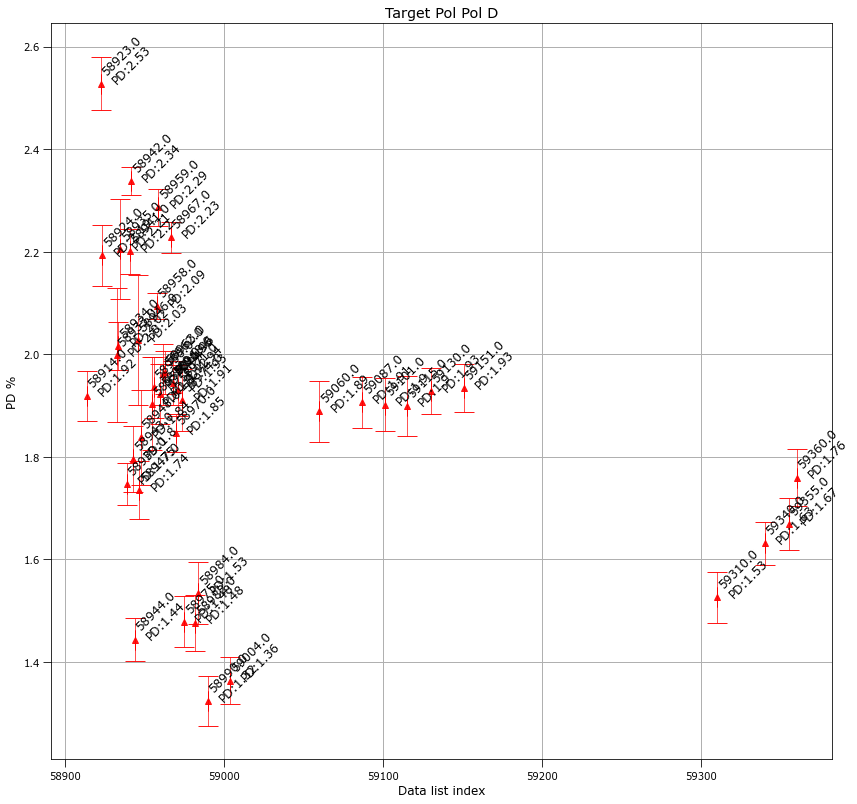

Calculate and Plot Polarization Angle (without returning data):


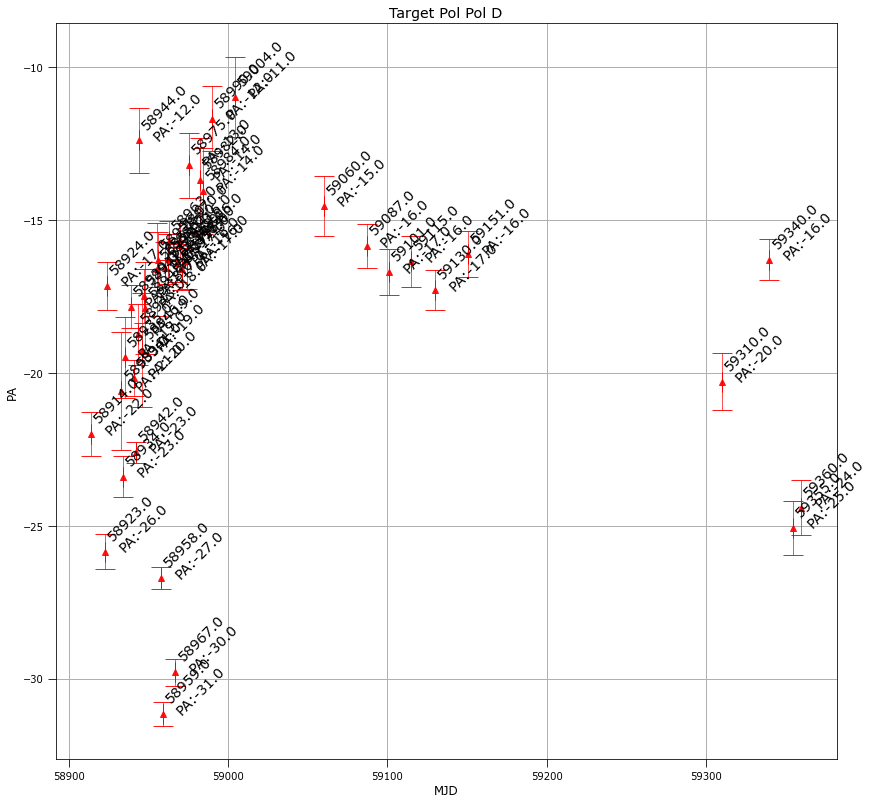

In [70]:
funcs_polarimetry.calc_pd2(data_EECep[0], 
                           data_EECep[1],
                           'Target Pol Pol D', 
                           'red', 
                           perc_arg=True, 
                           verbose_calc_pd=True,
                           verbose_data=True)

funcs_polarimetry.calc_pa2(data_EECep[0], 
                           data_EECep[1],
                           'Target Pol Pol D', 
                           'red', 
                           deg_arg=True, 
                           verbose_calc_pa=False,
                           verbose_data=True)

Calculate and Plot Polarization Degree (without returning data):


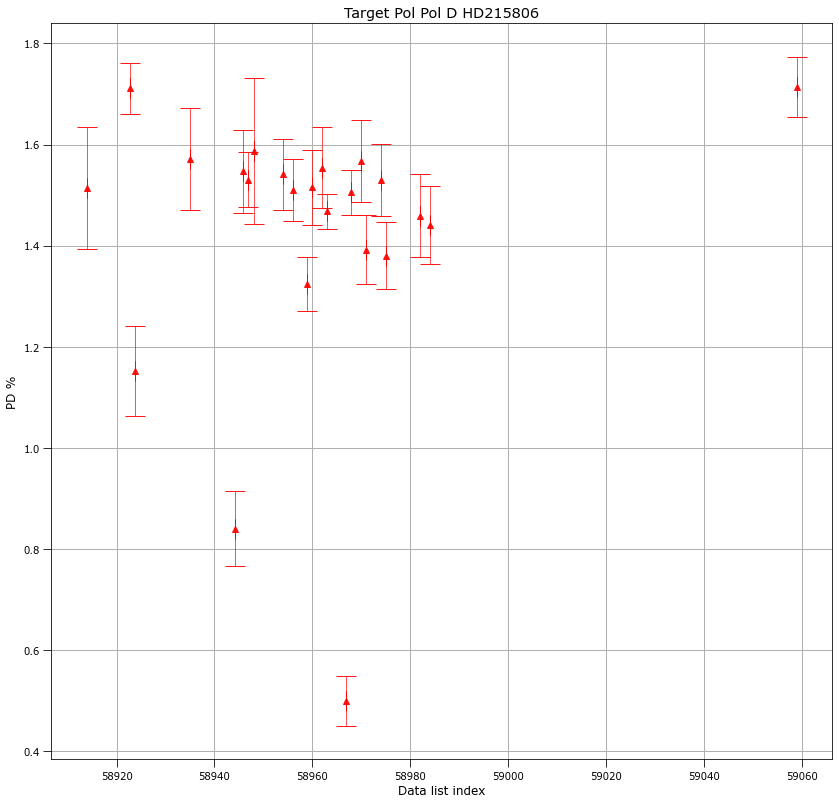

Calculate and Plot Polarization Angle (without returning data):


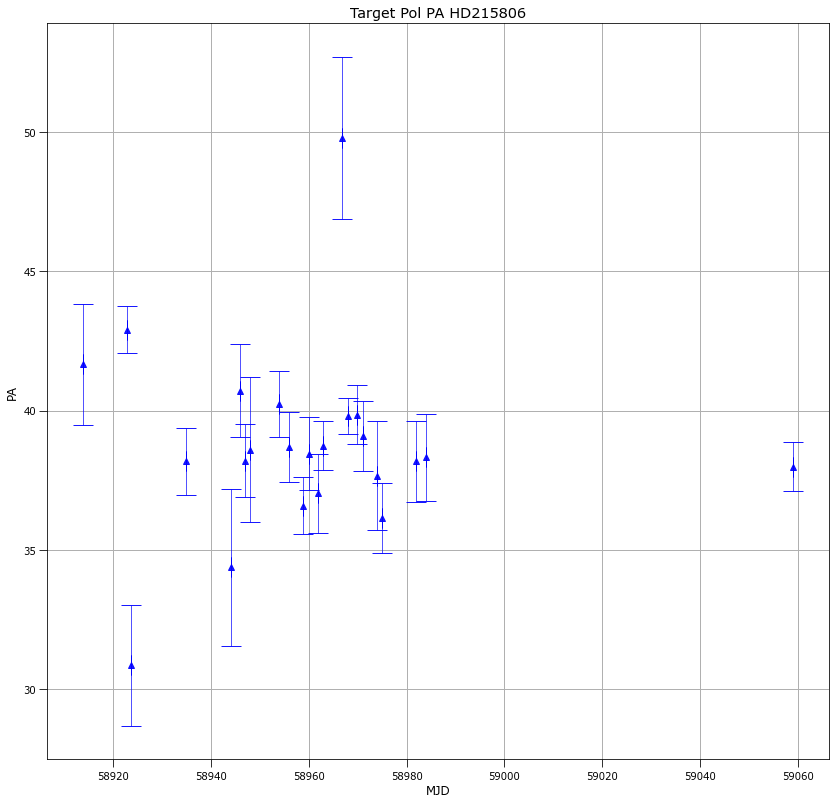

In [42]:
funcs_polarimetry.calc_pd2(data_hd2158[0], 
                           data_hd2158[1],
                           'Target Pol Pol D HD215806', 
                           'red', 
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

funcs_polarimetry.calc_pa2(data_hd2158[0], 
                           data_hd2158[1],
                           'Target Pol PA HD215806', 
                           'blue', 
                           deg_arg=True, 
                           verbose_calc_pa=False,
                           verbose_data=False)

In [68]:
#data_PA[1]

[0.19402501381188378,
 0.14413344504166806,
 0.15030112595228667,
 0.19732812310840134,
 0.23147745399582,
 0.15544451565056655,
 0.22160575109017555,
 0.19402261081408873,
 0.17388146105511432,
 0.146193742124138,
 0.14590477051889542,
 0.19007568115704893,
 0.23216679513458274,
 0.2193481975043842,
 0.10781866754614845,
 0.1382968705335635,
 0.18857579233249572,
 0.5563246709323446,
 0.1172360355076116,
 0.12233264974609104,
 0.14125832371760744,
 0.30961758363102954,
 0.11553591892694631,
 0.2064825066946604,
 0.111430590842173,
 0.09687048866242125,
 0.1236314121760389,
 0.21752981336739322,
 0.24967083661739917,
 0.12019455854447088,
 0.14339804438779855,
 0.13836654700907738,
 0.10914582489990801,
 0.1399740470286284,
 0.14839984331317552,
 0.15061675984239734,
 0.15690379761784853,
 0.12384264756269903,
 0.18084102148889533,
 0.14362216797525124,
 0.14481712256647605]

In [37]:
data_PD = funcs_polarimetry.calc_PD_stability(data_EECep[0], 
                                           data_EECep[1],
                                           perc_arg=True)

data_PA = funcs_polarimetry.calc_PA_stability(data_EECep[0], 
                                           data_EECep[1],
                                           deg_arg=True)

data_HD21_PD = funcs_polarimetry.calc_PD_stability(data_EECep[0], 
                                           data_EECep[1],
                                           perc_arg=True)

data_HD21_PA = funcs_polarimetry.calc_PA_stability(data_EECep[0], 
                                           data_EECep[1],
                                           deg_arg=True)

Only Calculates Polarization Degree stability and returns result
Only Calculates Position Angle and return result


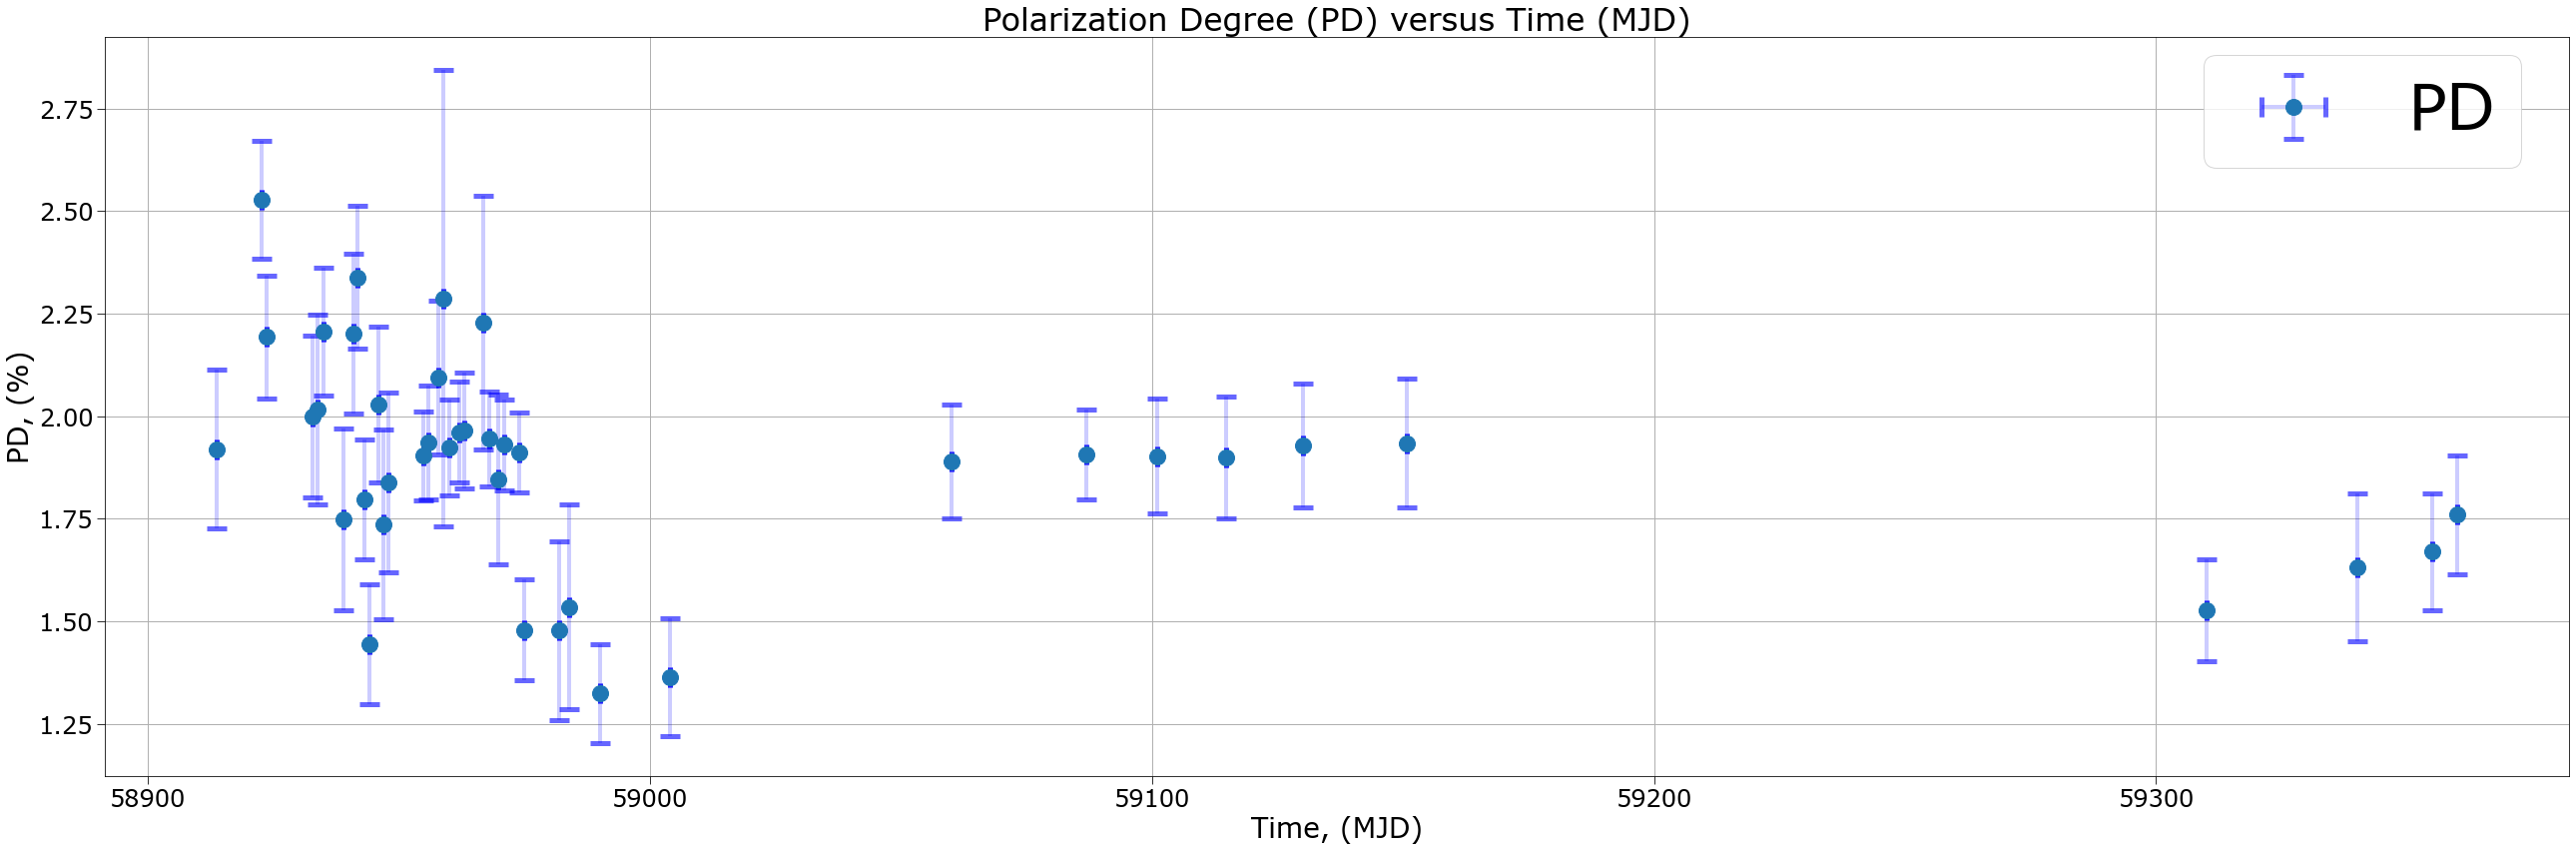

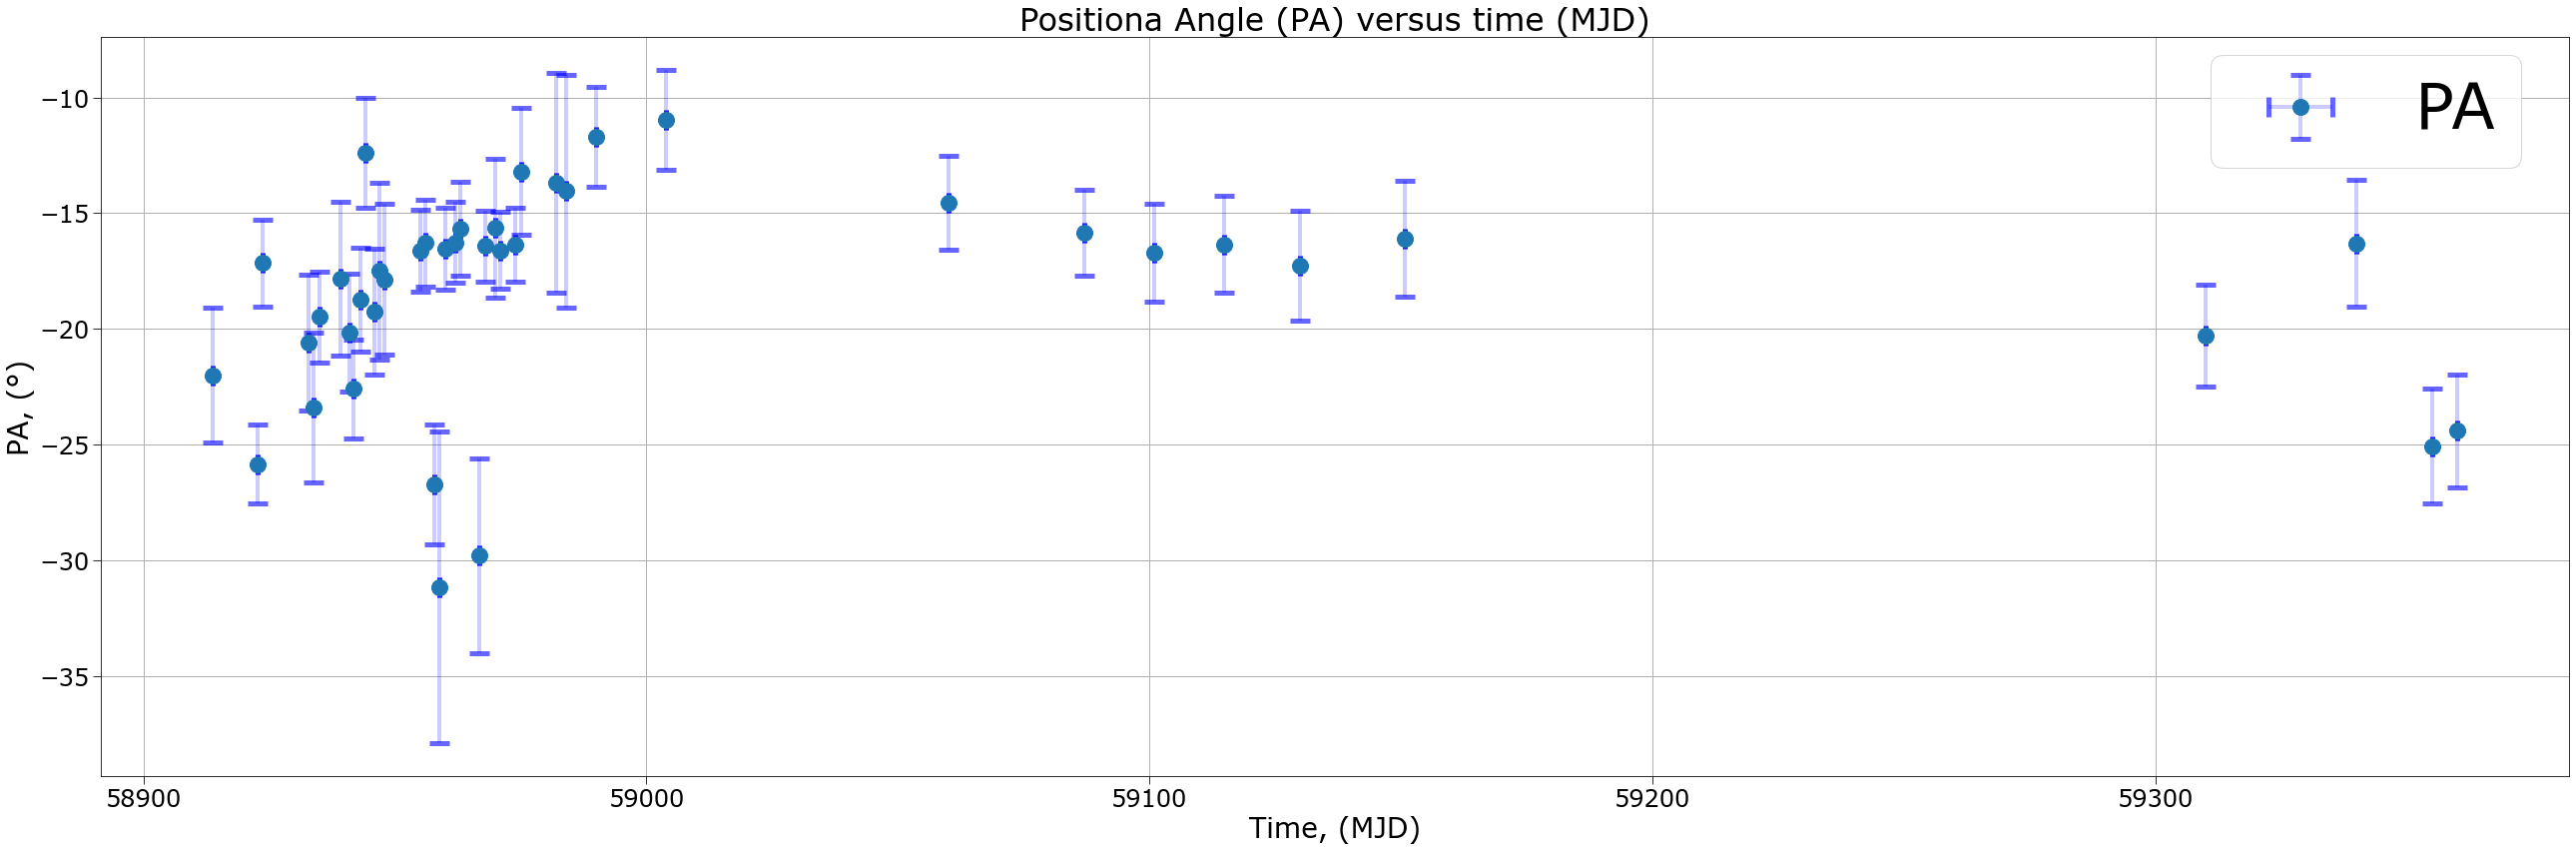

In [38]:
funcs_polarimetry.plot_pol_stab(data_PD[2], data_PD[0], data_PD[1], plot_what='PD')
funcs_polarimetry.plot_pol_stab(data_PA[2], data_PA[0], data_PA[1], plot_what='PA')

In [ ]:
#you will have an artefact called "calibrated data" and you will feed these to the same plot tools

In [ ]:
funcs_polarimetry.plot_pol_stab(data_PD[2], data_PD[0], data_PD[1], plot_what='PD')
funcs_polarimetry.plot_pol_stab(data_PA[2], data_PA[0], data_PA[1], plot_what='PA')

In [74]:
#print("q_mean:", q_stab)
#print("u_mean:", u_stab)

#data_strs = ['215806']
#filtered_data = funcs_utils.filter_data(high_pol_data, data_strs)

#funcs_polarimetry.calib_data(filtered_data, (q_stab[0], q_stab[1] ,u_stab[0], u_stab[1]), False, True) #just work on the artefact
                                                                                                 #Filtered Data

#for zi in range(0, len(zero_pol_data)):
#    q_m, u_m = funcs_polarimetry.mean_q_u_check(filtered_data, zi, "RINGO", True) #Its very small. I'm digging it
#    print(q_m, u_m, "\n")
#plt.scatter(target_qs, target_us, color = 'red', alpha=0.11)
#plt.errorbar(target_qs, target_us, xerr=targ_qstds, yerr=targ_ustds, lw=0.75, fmt="o", color="r", alpha=0.1)
#compare q added in quadrature

#and np.std(q)

#Then you would have learned something and solved todays problem

#Lets calculate Instrumental Polarization

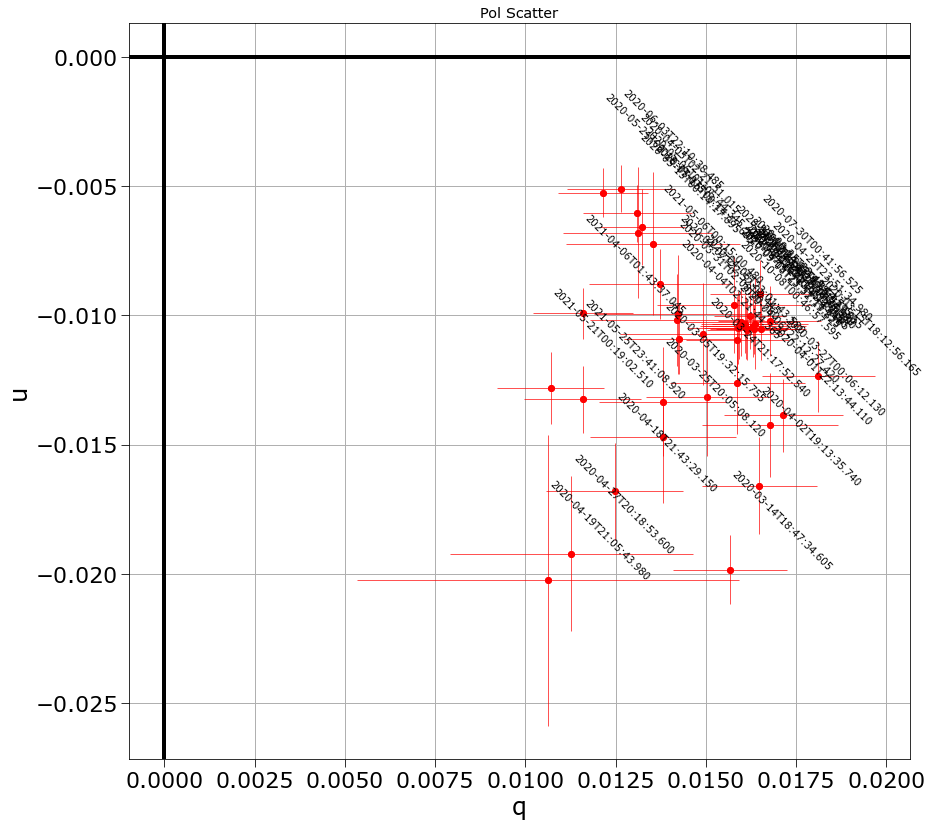

In [62]:
funcs_polarimetry.q_n_u_single_plot_v1(data_EECep[0], 
                                       data_EECep[1], 
                                       plot_c='red')

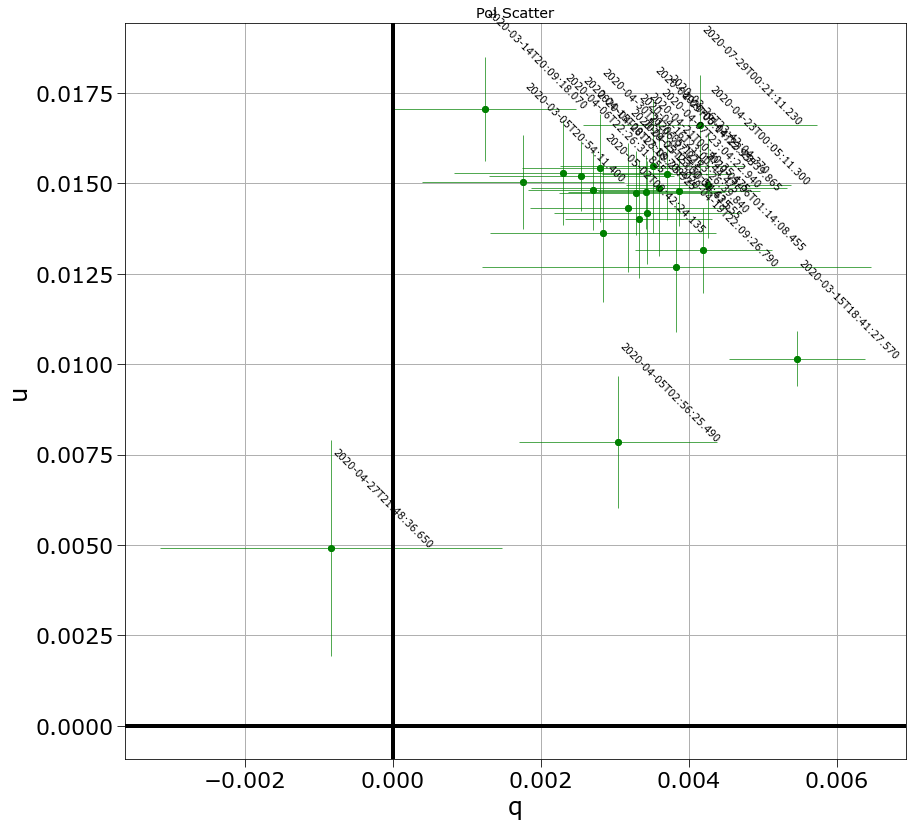

In [64]:
funcs_polarimetry.q_n_u_single_plot_v1(data_hd2158[0], 
                                       data_hd2158[1], 
                                       plot_c='green')

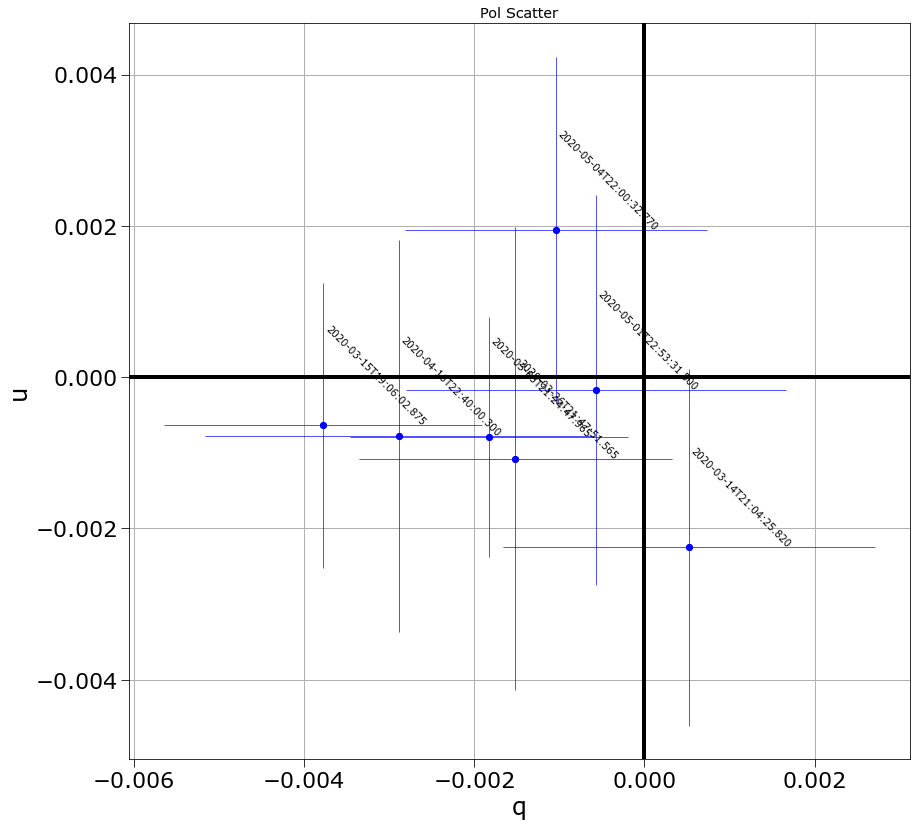

In [73]:
funcs_polarimetry.q_n_u_single_plot_v1(data_g191[0], 
                                       data_g191[1], 
                                       plot_c='blue')

#funcs_polarimetry.q_n_u_single_plot_v1(high_pol_data, 'green', './img_out/all_high_pols', 'high_pol', False, True ,True, False) #